# Redes Neuronales (MLP)

Carrera: Ciencia de la computación   
Profesor:  Cristain López Del Alamo


In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt


(200,)
(200, 1)
(200, 1)


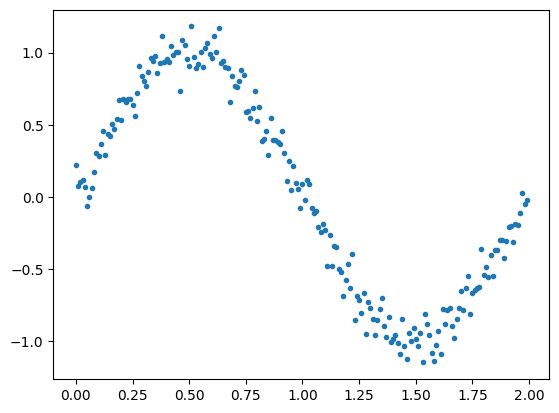

In [ ]:
n = 2000
x = np.arange(0,2,0.01)
y = [np.sin(i*np.pi )  +  np.random.normal(0,0.1) for i in x]
plt.plot(x,y, '.')

#######################################

print(x.shape)
x = x.reshape(len(x),1)
print(x.shape)
y = (np.array(y)).reshape(len(x),1)
print(y.shape)


In [ ]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

print(x.shape)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

#x.cuda()
#y.cuda()




TypeError: expected np.ndarray (got Tensor)

In [ ]:
class MLP(torch.nn.Module):
        def __init__(self, n ):
            super(MLP, self).__init__()
            self.layer_1 = nn.Sequential(torch.nn.Linear(1,n),nn.Sigmoid(),torch.nn.Linear(n,1),nn.Tanh())
        def forward(self, x):
            output = self.layer_1(x)
            return output


In [ ]:
model2 = MLP(3).to(device)
f_loss = torch.nn.MSELoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr = 0.01)



In [ ]:
def train(model, f_loss, optimizer,epochs, x_train, y_train):
  loss_lista = []
  i=0
  for epoch in range(epochs):

    x_train = x_train.to(device)
    y_train = y_train.to(device)

    # Propagacion adelante
    y_pred =   model(x_train)

    loss = f_loss(y_pred,y_train)
    loss_lista.append(loss.cpu())
    i=i+1
    if (epoch%500==0):
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return loss_lista

In [ ]:

print("Modelo 2")
loss_lista2 = train(model2,f_loss, optimizer2, 5000, x,y)




Modelo 2
Epoch 0: train loss: 0.572418749332428
Epoch 500: train loss: 0.11807660013437271
Epoch 1000: train loss: 0.1085074245929718
Epoch 1500: train loss: 0.0933929830789566
Epoch 2000: train loss: 0.0680905431509018
Epoch 2500: train loss: 0.04163321107625961
Epoch 3000: train loss: 0.029015501961112022
Epoch 3500: train loss: 0.01915307156741619
Epoch 4000: train loss: 0.014520732685923576
Epoch 4500: train loss: 0.012673916295170784


In [ ]:
def figura(modelo,i):
  f = plt.figure(figsize=(5,20))
  with torch.no_grad():
    x = torch.FloatTensor(np.arange(0,2,0.01)).unsqueeze(1).to(device)
    y_pred = modelo(x)
    x = x.cpu()
    y_pred = y_pred.cpu()
    ax2 = plt.subplot(5,1,i)
    plt.plot(x,y_pred)
    plt.plot(x,y,'*')



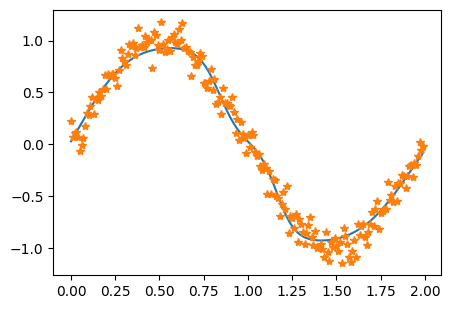

In [ ]:

figura(model2,1)
plt.show()

